In [ ]:
# Getting Matlab logo data
using CSV, DataFrames, Statistics, Random, SparseArrays, Plots;
pyplot()
data = Matrix(CSV.read("../../data/membrane.csv"));
X = [[i,j] for i=1:size(data,1) for j=1:size(data,2)];
X = transpose(hcat(X...));
Y = [data[i,j] for i=1:size(data,1) for j=1:size(data,2)];
idxs = rand(1:length(Y), 1000);

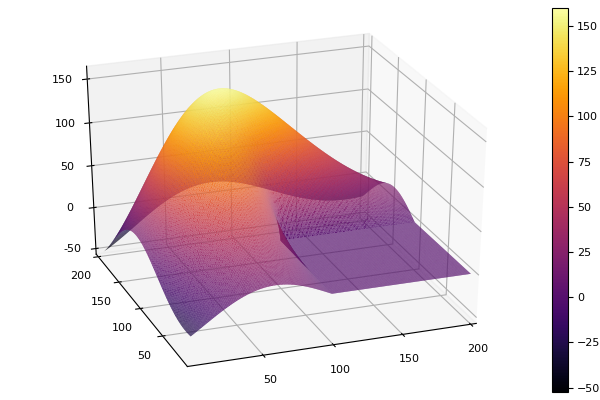

In [74]:
# Drawing the surface of MATLAB logo
plot(X[:,1], X[:,2],Y, st=:surface, camera=(-20,30))
# plot!(X[idxs,1], X[idxs,2], 60 .*ones(length(idxs)), st=:surface)

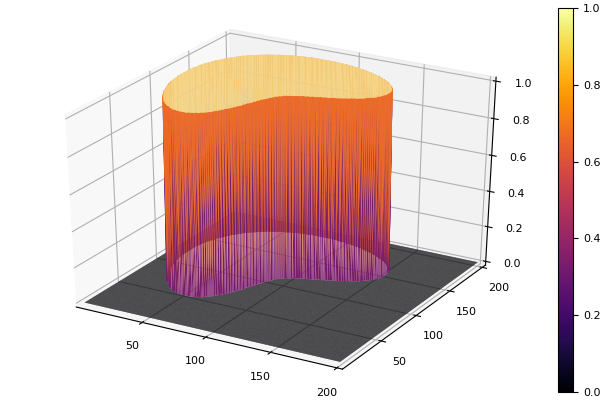

In [75]:
# How about all values above 60?
threshold = 60;
bin = Y .>= threshold;
bin_idxs = findall(x -> x.>=threshold, idxs);
plot(X[:,1], X[:,2], bin, st=:surface)


In [73]:
# Let's see if our algorithm can recognise this feasible region. 
include("../src/fit.jl");
lnr = base_otc();
IAI.set_params!(lnr, max_depth=7)
IAI.fit!(lnr, X[idxs,:], bin[idxs])

Training trees...                  100%|████████████████| Time: 0:00:24

Fitted OptimalTreeClassifier:
  1) Split: 0.0001093 * x1 - 0.0001473 * x2 < -0.003436
    2) Split: 0.003681 * x1 + 0.001511 * x2 < 0.2128
      3) Predict: false (98.28%), [57,1], 58 points, error 1
      4) Split: -0.00003785 * x1 + 0.005 * x2 < 0.9175
        5) Split: -0.008908 * x1 + 0.004026 * x2 < 0.3161
          6) Split: 0.004975 * x1 + 0.003981 * x2 < 1.362
            7) Predict: true (98.99%), [3,294], 297 points, error 3
            8) Predict: false (100.00%), [38,0], 38 points, error 0
          9) Predict: false (72.41%), [42,16], 58 points, error 16
        10) Predict: false (100.00%), [74,0], 74 points, error 0
    11) Predict: false (96.84%), [460,15], 475 points, error 15

In [70]:
IAI.show_in_browser(lnr)

"C:\\Users\\Berk\\AppData\\Local\\Temp\\jl_14BF.tmp.html"

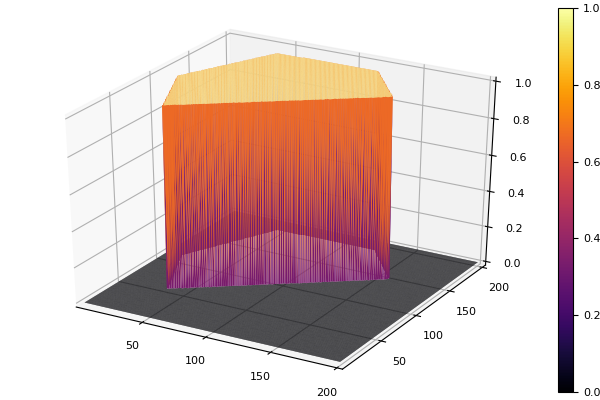

In [76]:
# Compare predictions and actual
predict = IAI.predict(lnr, X)
plot(X[:,1], X[:, 2], predict, st=:surface)
# plot!(X[idxs,1], X[idxs,2], predict, st=:surface)

In [77]:
print("Score: ", IAI.score(lnr, X, bin))

Score: 0.9480597014925373

In [ ]:
# How about trees in logspace
IAI.fit!(lnr, log.(X), Y)

Training trees...                    0%|█               |  ETA: N/A